# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy


# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)


## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(len(cities))


602


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
unit="imperial"

base_url = "http://api.openweathermap.org/data/2.5/weather?"
#set a series of list to collect data from the API
lat=[]
lon=[]
temp=[]
humid=[]
clouds=[]
wind=[]
NAME=[]
ID=[]
date=[]

#for loop to iterate over each city and collect pertinent info into list
#had to make try except because some cities gave an error 
for city_name in cities:
    try:
        search_url = base_url + "appid=" + api_key + "&q=" + city_name + "&units=" + unit
        weather = requests.get(search_url)
        weather_json = weather.json()
        
        NAME.append(weather_json["name"])
        ID.append(weather_json["id"])     
        lat.append(weather_json["coord"]["lat"])
        lon.append(weather_json["coord"]["lon"])
        temp.append(weather_json["main"]["temp"])
        humid.append(weather_json["main"]["humidity"])
        clouds.append(weather_json["clouds"]["all"])
        wind.append(weather_json["wind"]["speed"])
        date.append(weather_json["dt"])
        
        print("Data for:","City ID #:",weather_json["id"],"City Name:",weather_json["name"])
    except Exception:
        pass


Data for: City ID #: 6201424 City Name: Mataura
Data for: City ID #: 146639 City Name: Lasa
Data for: City ID #: 1282256 City Name: Hithadhoo
Data for: City ID #: 4020109 City Name: Atuona
Data for: City ID #: 5954718 City Name: Flin Flon
Data for: City ID #: 1507636 City Name: Chunskiy
Data for: City ID #: 1276857 City Name: Barsana
Data for: City ID #: 217637 City Name: Businga
Data for: City ID #: 5924351 City Name: Clyde River
Data for: City ID #: 3379507 City Name: Bartica
Data for: City ID #: 1014034 City Name: Carnarvon
Data for: City ID #: 1273574 City Name: Vaini
Data for: City ID #: 5983430 City Name: Innisfail
Data for: City ID #: 2092164 City Name: Lorengau
Data for: City ID #: 4030556 City Name: Rikitea
Data for: City ID #: 1006984 City Name: East London
Data for: City ID #: 6138908 City Name: Saint-Philippe
Data for: City ID #: 1624725 City Name: Tarakan
Data for: City ID #: 2110227 City Name: Butaritari
Data for: City ID #: 2181625 City Name: Te Anau
Data for: City ID #:

Data for: City ID #: 1488167 City Name: Ust-Koksa
Data for: City ID #: 1106677 City Name: Bambous Virieux
Data for: City ID #: 5180119 City Name: Berwick
Data for: City ID #: 3662342 City Name: Sao Gabriel da Cachoeira
Data for: City ID #: 2013918 City Name: Ust-Maya
Data for: City ID #: 2516304 City Name: Jodar
Data for: City ID #: 1264976 City Name: Leh
Data for: City ID #: 5655240 City Name: Great Falls
Data for: City ID #: 3616584 City Name: San Ramon
Data for: City ID #: 3583178 City Name: San Vicente
Data for: City ID #: 5738690 City Name: Madras
Data for: City ID #: 5880568 City Name: Bethel
Data for: City ID #: 3374210 City Name: Sao Filipe
Data for: City ID #: 5992500 City Name: Kingston
Data for: City ID #: 3220801 City Name: Buchen
Data for: City ID #: 1170398 City Name: Minchinabad
Data for: City ID #: 1712961 City Name: Gigmoto
Data for: City ID #: 1851279 City Name: Taga
Data for: City ID #: 5493811 City Name: Taos
Data for: City ID #: 3137942 City Name: Sola
Data for: Ci

Data for: City ID #: 2122262 City Name: Palana
Data for: City ID #: 1214658 City Name: Lhokseumawe
Data for: City ID #: 1226260 City Name: Trincomalee
Data for: City ID #: 2278158 City Name: Buchanan
Data for: City ID #: 1489499 City Name: Togur
Data for: City ID #: 1267390 City Name: Kavaratti
Data for: City ID #: 2027044 City Name: Batagay
Data for: City ID #: 1783621 City Name: Zunyi
Data for: City ID #: 2126123 City Name: Chokurdakh
Data for: City ID #: 60019 City Name: Eyl
Data for: City ID #: 1261901 City Name: Nanpara
Data for: City ID #: 2644210 City Name: Liverpool
Data for: City ID #: 5850554 City Name: Makakilo City
Data for: City ID #: 211734 City Name: Lisala
Data for: City ID #: 1562414 City Name: Vung Tau
Data for: City ID #: 509234 City Name: Pitkyaranta
Data for: City ID #: 4013704 City Name: Laguna
Data for: City ID #: 3372760 City Name: Praia da Vitoria
Data for: City ID #: 654441 City Name: Kangasala
Data for: City ID #: 4632595 City Name: Jackson
Data for: City ID 

Data for: City ID #: 5393052 City Name: Santa Cruz
Data for: City ID #: 2126682 City Name: Bilibino
Data for: City ID #: 5194868 City Name: Indiana
Data for: City ID #: 4984075 City Name: Alpena
Data for: City ID #: 1633034 City Name: Palu
Data for: City ID #: 1651591 City Name: Amahai
Data for: City ID #: 1788522 City Name: Xinye
Data for: City ID #: 1037125 City Name: Montepuez
Data for: City ID #: 2174444 City Name: Bowen
Data for: City ID #: 2701223 City Name: Katrineholm
Data for: City ID #: 618405 City Name: Comrat
Data for: City ID #: 6166142 City Name: Thunder Bay
Data for: City ID #: 3347762 City Name: Lubango
Data for: City ID #: 175499 City Name: Nchelenge
Data for: City ID #: 2422968 City Name: Boffa
Data for: City ID #: 1337612 City Name: Dhidhdhoo
Data for: City ID #: 2033149 City Name: Zhaoyuan
Data for: City ID #: 240604 City Name: Bambari
Data for: City ID #: 3692020 City Name: Nauta
Data for: City ID #: 898188 City Name: Siavonga
Data for: City ID #: 1280037 City Name

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
#Convert to dataframe

df = pd.DataFrame({"Name":NAME,"City ID #:":ID,"Lat":lat,"Lon":lon,"Temp_F":temp,"Humidity":humid,
                   "Cloudiness":clouds,"Windiness":wind})
df.to_csv("output_data_cities.csv")
df.head()


,Name,City ID #:,Lat,Lon,Temp_F,Humidity,Cloudiness,Windiness
0,Mataura,6201424,-46.19,168.86,64.00,63,56,4.00
1,Lasa,146639,34.92,32.53,62.37,100,20,5.82
2,Hithadhoo,1282256,-0.60,73.08,77.15,100,68,5.64
3,Atuona,4020109,-9.80,-139.03,81.20,100,8,5.97
4,Flin Flon,5954718,54.77,-101.88,-0.41,49,5,6.93


In [6]:
#subtract timezone difference
zone_date = date[0]-(5*60*60)

#Convert data to gregogrian date 
converted_date = pd.to_datetime(zone_date, unit='s')
print(converted_date)

2019-02-25 17:40:05


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

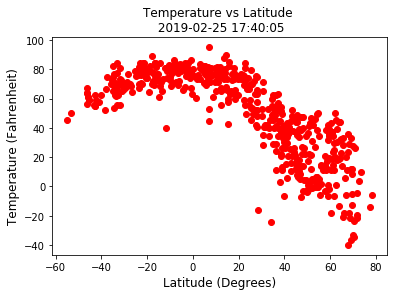

In [7]:
#Plot approprite x and y graph
plt.scatter(df.Lat,df.Temp_F,color="red")

#format plot
plt.title(f"Temperature vs Latitude \n {converted_date}")

plt.xlabel("Latitude (Degrees)",fontsize = 12)
plt.ylabel("Temperature (Fahrenheit)",fontsize=12)

#save figure
plt.savefig("Temperature vs Latitude.png")

#### Latitude vs. Humidity Plot

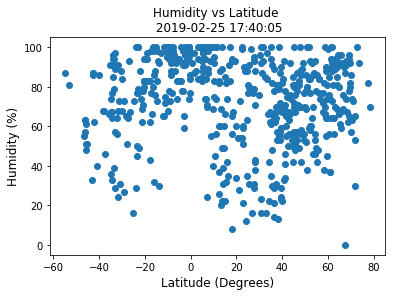

In [8]:
#Plot approprite x and y graph
plt.scatter(df.Lat,df.Humidity)

#format plot
plt.title(f"Humidity vs Latitude \n {converted_date}")
plt.xlabel("Latitude (Degrees)",fontsize = 12)
plt.ylabel("Humidity (%)",fontsize=12)

#save figure
plt.savefig("Humidity vs Latitude.png")

#### Latitude vs. Cloudiness Plot

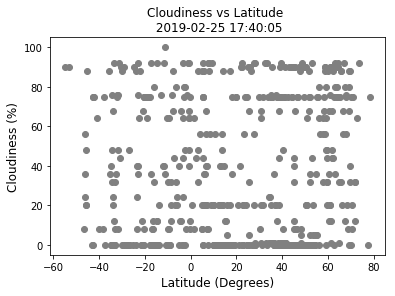

In [9]:
#Plot approprite x and y graph
plt.scatter(df.Lat,df.Cloudiness,color="grey")

#format plot
plt.title(f"Cloudiness vs Latitude \n {converted_date}")
plt.xlabel("Latitude (Degrees)",fontsize = 12)
plt.ylabel("Cloudiness (%)",fontsize=12)

#save figure
plt.savefig("Cloudiness vs Latitude.png")

#### Latitude vs. Wind Speed Plot

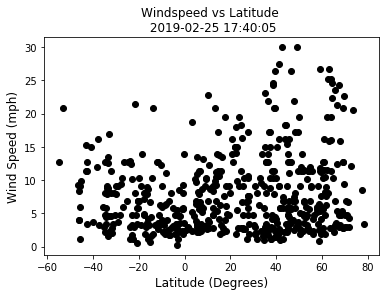

In [10]:
#Plot approprite x and y graph
plt.scatter(df.Lat,df.Windiness,color="black")

#format plot
plt.title(f"Windspeed vs Latitude \n {converted_date}")
plt.xlabel("Latitude (Degrees)",fontsize = 12)
plt.ylabel("Wind Speed (mph)",fontsize=12)

#save figure
plt.savefig("Windspeed vs Latitude.png")          

Analysis:  
There is no correlation between Latitude and windspeed, cloudiness, or humidity.

It would be interesting to investigate why and how cloudiness percentages are determined to see why there are clusters around certain numbers(90%,75%,20%,0)

There is a parabolic relationship between latitude and temperature with a parabolic vertex around 0.  I.E. the temperature is hottest around the equator and gets colder as one goes closer to the poles.

At this time of year negative latitudes(southern hemisphere) have higher temperatures compared to their positive counterpart which makes sense as it is currently winter in the northern hemisphere and summer in the southern.
